In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix, roc_curve, classification_report, auc

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X, y = pd.DataFrame(iris['data'], columns=iris['feature_names']), pd.DataFrame(iris['target'], columns=['type'])
df = pd.concat([X, y], axis=1)

In [14]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0).fit(X, y)

In [15]:
pred_y = model.predict(X)

In [16]:
confusion_matrix(y, pred_y)

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [17]:
print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



1.0
1.0
1.0


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass classes=[0, 1, 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


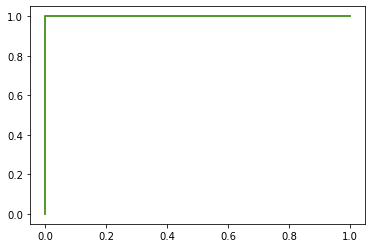

In [22]:
y_vec = label_binarize(y, [0, 1, 2])
for i in range(3):
    model = DecisionTreeClassifier(max_depth=10, random_state=0, criterion='entropy').fit(X, y_vec[:,i])
    pred_y = model.predict_proba(X)[:,1]
    fpr, tpr, thr = roc_curve(y_vec[:,i], pred_y)
    plt.plot(fpr, tpr)
    print(auc(fpr, tpr))
plt.show()

In [23]:
dot_data = export_graphviz(model, feature_names=X.columns.values,out_file=None)

In [24]:
graph = graphviz.Source(dot_data)

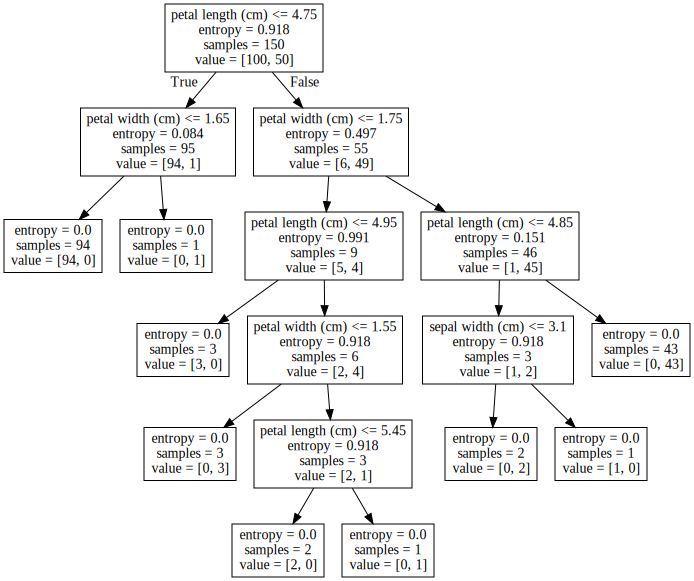

In [25]:
graph